In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import sys
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import IPython as IPy
import sklearn as skl
from sklearn.model_selection import train_test_split

import os
import tarfile
import urllib

import joblib

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Dataset

In [3]:
dataset = pd.read_csv("../datasets/arrhythmia/arrhythmia.data", header=None, na_values="?")

In [4]:
dataset

0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275  276   277   278  279  
0    0.0  0.0  0.9  2.9  23.3  49.4    8  
1    0.0  0.0  0.2  2.1  20.4  38.8    6  
2    0.0  0.0  0.3  3.4  12.3  49.0   10  
3    0.0  0.0  0.4  2.6  34.6  61.6    1  
4    0.0  0.0 -0.1  3.9  25.4  62.8    7  
..   ...  ...  ...  ...   ...   ...  ...  
447  0.0  0.0  0.7  0.6  -4.4  -0.5    1  
448  0.0  0.0  0.4  2.4  38.0  62.4   10  
449  0.0  0.0  1.5  1.0 -44.2 -33.2    2  
450  0.0  0.0  0.5  2.4  25.0  46.6    1  
451  0.0  0.0  0.5  1.6  21.3  32.8    1  

[452 rows x 280 columns]

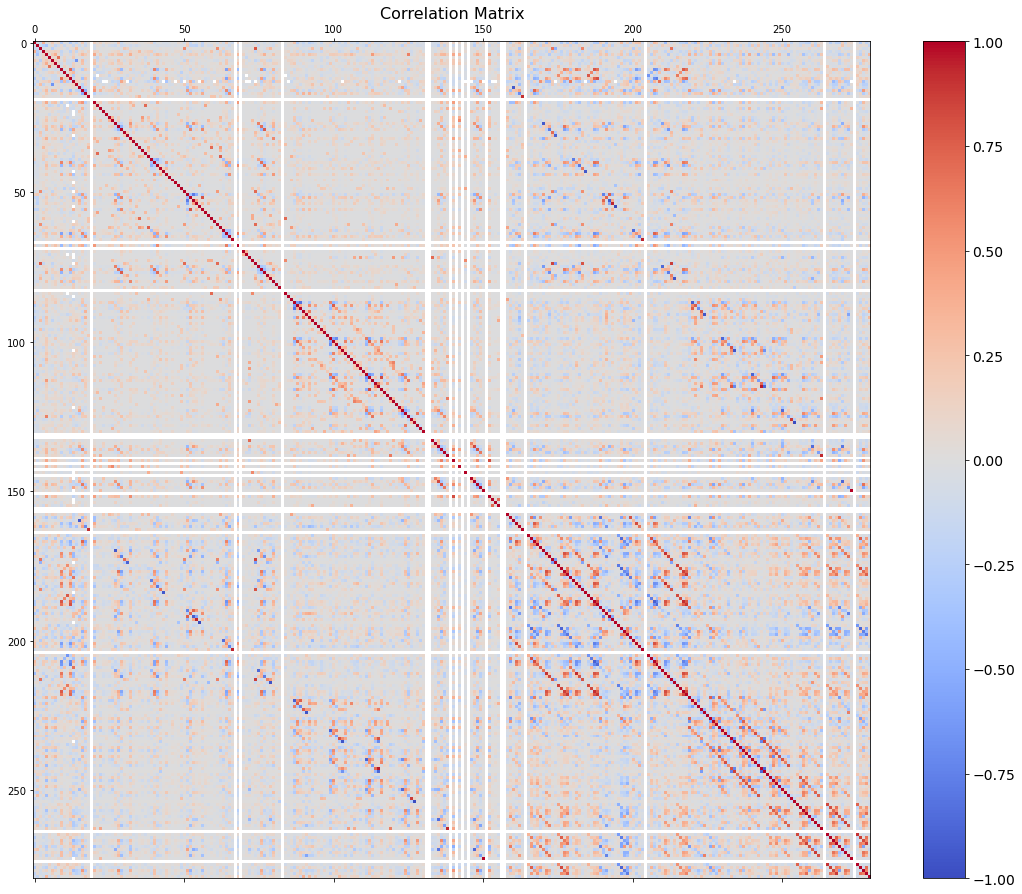

In [5]:
fig = plt.figure(figsize=(19, 15))
plt.matshow(dataset.corr(), fignum=fig.number, cmap = "coolwarm")
#plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
#plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

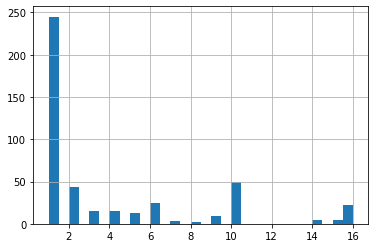

In [6]:
%matplotlib inline 
dataset[279].hist(bins=30)
plt.show()

In [7]:
mask = (dataset[279] > 1)
dataset_binary = dataset
#dataset_binary.loc[mask_0, 279] = 0
dataset_binary.loc[mask, 279] = 0
dataset_binary

0    1    2    3    4    5    6    7    8    9    ...  270   271   272  \
0     75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0  -0.9   
1     56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5   0.0   
2     54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5  -2.4   
3     55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2  -2.2   
4     75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1  -3.6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
447   53    1  160   70   80  199  382  154  117  -37  ...  0.0   4.3  -5.0   
448   37    0  190   85  100  137  361  201   73   86  ...  0.0  15.6  -1.6   
449   36    0  166   68  108  176  365  194  116  -85  ...  0.0  16.3 -28.6   
450   32    1  155   55   93  106  386  218   63   54  ... -0.4  12.0  -0.7   
451   78    1  160   70   79  127  364  138   78   28  ...  0.0  10.4  -1.8   

     273  274  275  276   277   278  279  
0    0.0  0.0  0.9  2.9  23.3  49.4    0  
1    0.0  0.0  0.2  2.1  20.4  38.8    0  
2    0.0  0.0  0.3  3.4  12.3  49.0    0  
3    0.0  0.0  0.4  2.6  34.6  61.6    1  
4    0.0  0.0 -0.1  3.9  25.4  62.8    0  
..   ...  ...  ...  ...   ...   ...  ...  
447  0.0  0.0  0.7  0.6  -4.4  -0.5    1  
448  0.0  0.0  0.4  2.4  38.0  62.4    0  
449  0.0  0.0  1.5  1.0 -44.2 -33.2    0  
450  0.0  0.0  0.5  2.4  25.0  46.6    1  
451  0.0  0.0  0.5  1.6  21.3  32.8    1  

[452 rows x 280 columns]

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(dataset_binary, dataset_binary[279]):
    strat_train_set = dataset_binary.loc[train_index]
    strat_test_set = dataset_binary.loc[test_index]

In [9]:
X_train_raw = strat_train_set.drop(279, axis=1)
y_train = strat_train_set[279].copy()

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

problem_features_ixs = [13]

class FeatureDeleter(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        for i in problem_features_ixs:
            X = np.delete(X, i, axis = 1)
        return X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('feature_deleter', FeatureDeleter()), #for whatever reason this must be after the SimpleImputer...
                         ('std_scaler', StandardScaler()),
                        ])

X_train = num_pipeline.fit_transform(X_train_raw) 

## Algorithms

### SGDClassifier

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42).fit(X_train, y_train)

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.7768595, 0.65     , 0.7      ])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_train_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

#### Confusion matrix and further analysis

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[110,  55],
       [ 50, 146]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_train_pred), 
                                                                   recall_score(y_train, y_train_pred), 
                                                                   f1_score(y_train, y_train_pred)
                                                                  ))

Precision score: 0.7263681592039801
Recall score: 0.7448979591836735
F1 score: 0.7355163727959698


In [17]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

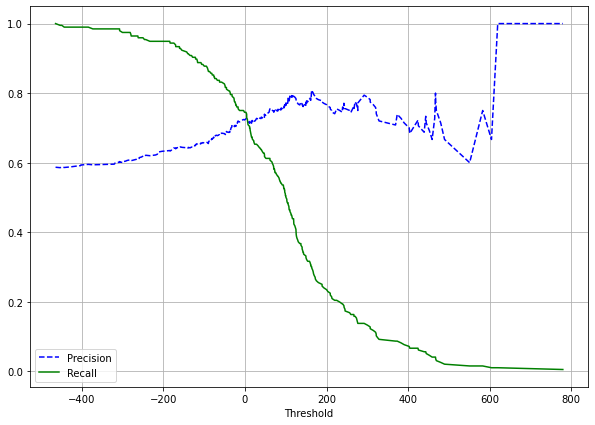

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    fig = plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = 'best')
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#Doesn't look promising ngl

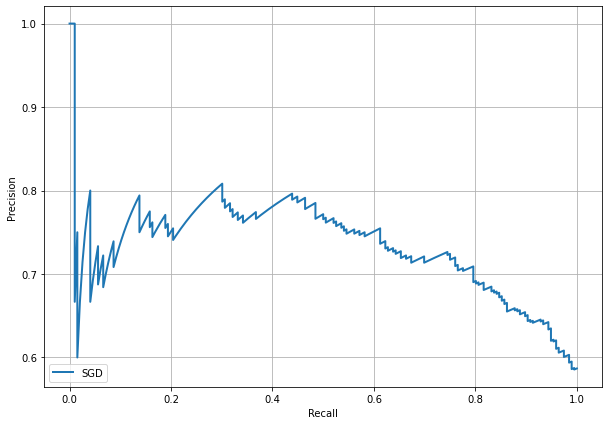

In [19]:
def plot_prec_vs_recall(precision, recall, label = None):
    fig = plt.figure(figsize=(10, 7))
    plt.plot(recall, precision, linewidth = 2, label = label)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.legend(loc = 'best')
    plt.grid()
    
plot_prec_vs_recall(precisions, recalls, label = "SGD")
plt.legend(loc="lower left")
plt.show()

#No comments

### RandomForest

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 3, method = "predict_proba")
y_probas_forest

array([[0.42, 0.58],
       [0.12, 0.88],
       [0.37, 0.63],
       [0.07, 0.93],
       [0.63, 0.37],
       [0.68, 0.32],
       [0.28, 0.72],
       [0.3 , 0.7 ],
       [0.19, 0.81],
       [0.09, 0.91],
       [0.22, 0.78],
       [0.35, 0.65],
       [0.15, 0.85],
       [0.62, 0.38],
       [0.36, 0.64],
       [0.22, 0.78],
       [0.11, 0.89],
       [0.59, 0.41],
       [0.59, 0.41],
       [0.7 , 0.3 ],
       [0.53, 0.47],
       [0.48, 0.52],
       [0.08, 0.92],
       [0.23, 0.77],
       [0.48, 0.52],
       [0.35, 0.65],
       [0.57, 0.43],
       [0.38, 0.62],
       [0.06, 0.94],
       [0.72, 0.28],
       [0.29, 0.71],
       [0.62, 0.38],
       [0.17, 0.83],
       [0.12, 0.88],
       [0.87, 0.13],
       [0.88, 0.12],
       [0.13, 0.87],
       [0.73, 0.27],
       [0.39, 0.61],
       [0.39, 0.61],
       [0.69, 0.31],
       [0.4 , 0.6 ],
       [0.2 , 0.8 ],
       [0.61, 0.39],
       [0.14, 0.86],
       [0.08, 0.92],
       [0.28, 0.72],
       [0.44,

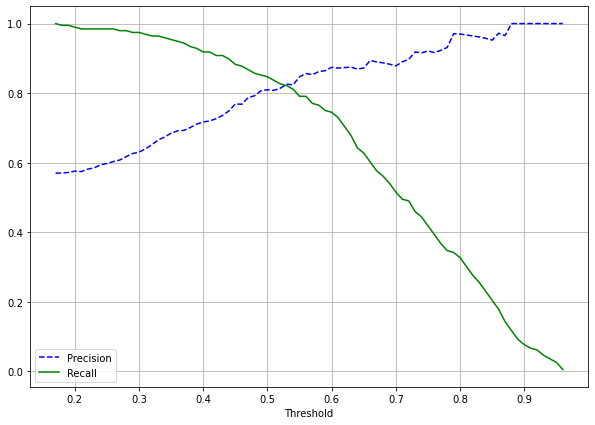

In [21]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train, y_scores_forest)
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)
plt.show()

#Looks way better

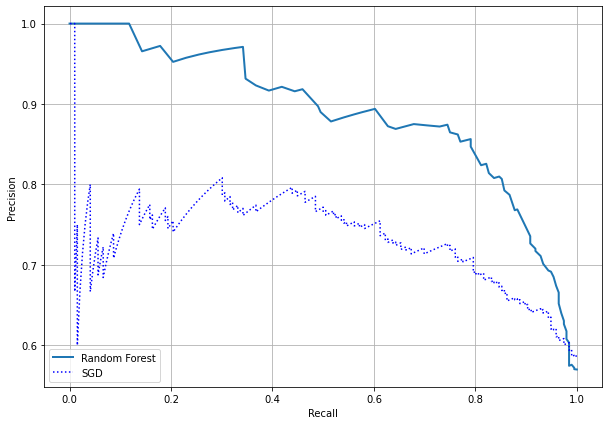

In [22]:
plot_prec_vs_recall(precisions_forest, recalls_forest, label = "Random Forest")
plt.plot(recalls, precisions, "b:", label="SGD")
plt.legend(loc="lower left")
plt.show()

#As expected, RandomForest is more reasonable to use

In [23]:
#As we want to find as many unhealthy people as possible, we need to sacrifice the accuracy of detecting healthy ones
#In other terms, we want high precision even if it means low recall

threshold_95_precision = thresholds_forest[np.argmax(precisions_forest >= 0.95)]
threshold_95_precision

0.79

In [24]:
y_train_pred_95 = (y_scores_forest >= threshold_95_precision)

confusion_matrix(y_train, y_train_pred_95)

#Way better recognition of unhealthiness... although, too many healthy people will have to worry

array([[163,   2],
       [129,  67]], dtype=int64)

In [25]:
print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_train_pred_95), 
                                                                   recall_score(y_train, y_train_pred_95), 
                                                                   f1_score(y_train, y_train_pred_95)
                                                                  ))

Precision score: 0.9710144927536232
Recall score: 0.34183673469387754
F1 score: 0.5056603773584906


### Logistic Regression

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

consts = [2, 1.75, 1.5, 1.25, 1, 0.75, 0.5, 0.25, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001, 0.00075, 0.0005]
param_grid = [{'C': consts}]
log_reg = LogisticRegression(max_iter = 100000)
               
grid_search_f1 = GridSearchCV(log_reg, param_grid, cv=3, scoring='f1', return_train_score=True)

grid_search_f1.fit(X_train, y_train)
grid_search_f1.best_params_

{'C': 0.0025}

In [27]:
cvres_f1 = grid_search_f1.cv_results_
for mean_score, params in zip(cvres_f1["mean_test_score"], cvres_f1["params"]):
    print(mean_score, params)

0.7533800470796245 {'C': 2}
0.7490308030827539 {'C': 1.75}
0.7527840285108561 {'C': 1.5}
0.750894562285065 {'C': 1.25}
0.7568458472872793 {'C': 1}
0.7556563366087176 {'C': 0.75}
0.7647266313932981 {'C': 0.5}
0.7764197530864198 {'C': 0.25}
0.7838394787802826 {'C': 0.1}
0.7789110713652696 {'C': 0.075}
0.7692824401258979 {'C': 0.05}
0.7857658622299096 {'C': 0.025}
0.7950096101550176 {'C': 0.01}
0.7931143595131308 {'C': 0.0075}
0.789468882183443 {'C': 0.005}
0.8048490874112874 {'C': 0.0025}
0.786670819059483 {'C': 0.001}
0.7765724471606825 {'C': 0.00075}
0.7676845170158192 {'C': 0.0005}


In [28]:
log_reg_best = grid_search_f1.best_estimator_

y_train_pred_log = cross_val_predict(log_reg_best, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_log)

array([[ 94,  71],
       [ 16, 180]], dtype=int64)

In [29]:
print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_train_pred_log), 
                                                                   recall_score(y_train, y_train_pred_log), 
                                                                   f1_score(y_train, y_train_pred_log)
                                                                  ))

Precision score: 0.7171314741035857
Recall score: 0.9183673469387755
F1 score: 0.8053691275167786


In [30]:
y_scores_log = cross_val_predict(log_reg_best, X_train, y_train, cv=3, method="decision_function")

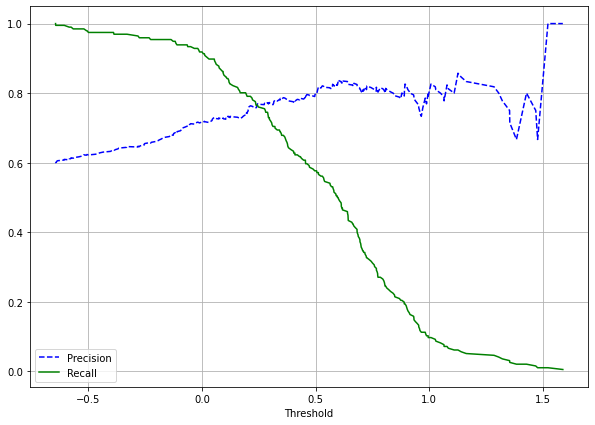

In [31]:
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train, y_scores_log)
plot_precision_recall_vs_threshold(precisions_log, recalls_log, thresholds_log)
plt.show()

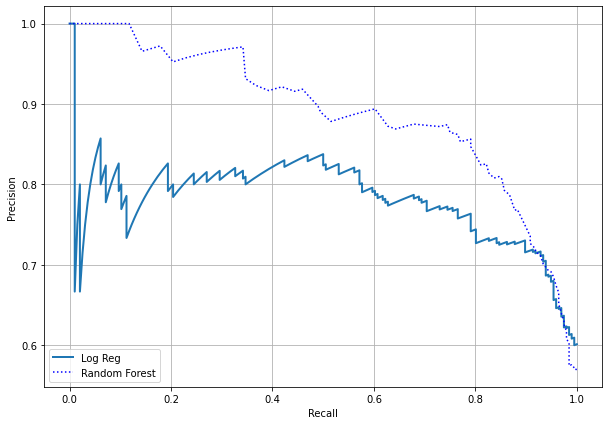

In [32]:
plot_prec_vs_recall(precisions_log, recalls_log, label = "Log Reg")
plt.plot(recalls_forest, precisions_forest, "b:", label="Random Forest")
plt.legend(loc="lower left")
plt.show()

#No way...

### Linear SVM

In [33]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(max_iter = 100000)
               
grid_search_f1 = GridSearchCV(lin_svc, param_grid, cv=3, scoring='f1', return_train_score=True)

grid_search_f1.fit(X_train, y_train)
grid_search_f1.best_params_

{'C': 0.0025}

In [34]:
cvres_f1 = grid_search_f1.cv_results_
for mean_score, params in zip(cvres_f1["mean_test_score"], cvres_f1["params"]):
    print(mean_score, params)

0.7184400500479686 {'C': 2}
0.721472597034816 {'C': 1.75}
0.718193214828109 {'C': 1.5}
0.718193214828109 {'C': 1.25}
0.721472597034816 {'C': 1}
0.7228610472286104 {'C': 0.75}
0.7346612505913636 {'C': 0.5}
0.735164648297478 {'C': 0.25}
0.760830141856664 {'C': 0.1}
0.7637589970923303 {'C': 0.075}
0.7662531612191819 {'C': 0.05}
0.7727555746840776 {'C': 0.025}
0.7800846663363158 {'C': 0.01}
0.7850025485484866 {'C': 0.0075}
0.7868097984007787 {'C': 0.005}
0.7887344199424735 {'C': 0.0025}
0.7837837837837838 {'C': 0.001}
0.7785388127853882 {'C': 0.00075}
0.7809155210444493 {'C': 0.0005}


In [35]:
lin_svc_best = grid_search_f1.best_estimator_

In [36]:
y_train_pred_svc = cross_val_predict(lin_svc_best, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_svc)

array([[104,  61],
       [ 28, 168]], dtype=int64)

In [37]:
print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_train_pred_svc), 
                                                                   recall_score(y_train, y_train_pred_svc), 
                                                                   f1_score(y_train, y_train_pred_svc)
                                                                  ))

Precision score: 0.7336244541484717
Recall score: 0.8571428571428571
F1 score: 0.7905882352941177


In [38]:
y_scores_svc = cross_val_predict(lin_svc_best, X_train, y_train, cv=3, method="decision_function")

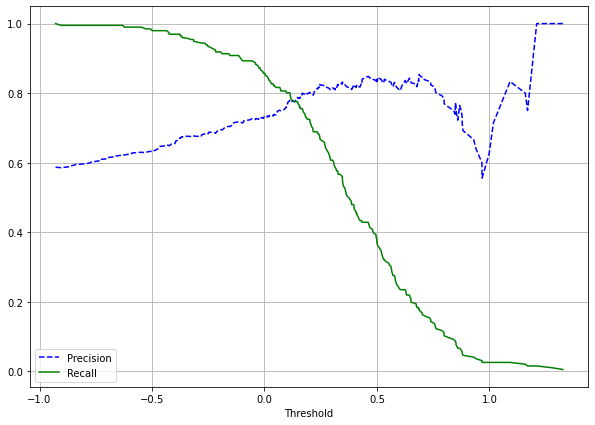

In [39]:
precisions_svc, recalls_svc, thresholds_svc = precision_recall_curve(y_train, y_scores_svc)
plot_precision_recall_vs_threshold(precisions_svc, recalls_svc, thresholds_svc)
plt.show()

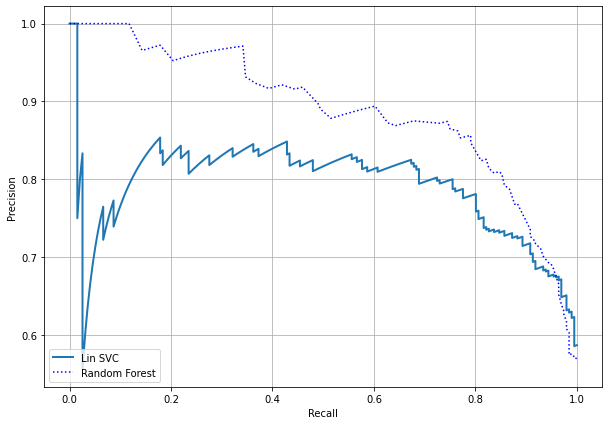

In [40]:
plot_prec_vs_recall(precisions_svc, recalls_svc, label = "Lin SVC")
plt.plot(recalls_forest, precisions_forest, "b:", label="Random Forest")
plt.legend(loc="lower left")
plt.show()

In [41]:
threshold_85_precision = thresholds_svc[np.argmax(precisions_svc >= 0.85)]
threshold_85_precision

0.6873837687222928

In [42]:
y_train_pred_85 = (y_scores_svc >= threshold_85_precision)

confusion_matrix(y_train, y_train_pred_85)

array([[159,   6],
       [161,  35]], dtype=int64)

In [43]:
print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_train, y_train_pred_85), 
                                                                   recall_score(y_train, y_train_pred_85), 
                                                                   f1_score(y_train, y_train_pred_85)
                                                                  ))

Precision score: 0.8536585365853658
Recall score: 0.17857142857142858
F1 score: 0.29535864978902954


In [44]:
#Seems like Random Forest is the best choice

## Prediction function

In [45]:
def predict_by_proba(X_, model, threshold):
    y_probas = model.predict_proba(X_)
    y_scores = y_probas[:, 1]
    y_pred = (y_scores >= threshold)
    return y_pred

In [46]:
def predict_by_decision_func(X_, model, threshold):
    y_scores = model.decision_function(X_)
    y_pred = (y_scores >= threshold)
    return y_pred

## Final tests

In [47]:
#Preparing the data
X_test_raw = strat_test_set.drop(279, axis=1)
y_test = strat_test_set[279].copy()

X_test = num_pipeline.fit_transform(X_test_raw)

In [48]:
#Random Forest
forest_clf.fit(X_train, y_train)
threshold_forest_final = threshold_95_precision

In [49]:
y_test_pred_forest = predict_by_proba(X_test, forest_clf, threshold_forest_final)

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test, y_test_pred_forest), 
                                                                   recall_score(y_test, y_test_pred_forest), 
                                                                   f1_score(y_test, y_test_pred_forest)
                                                                  ))

Precision score: 0.8666666666666667
Recall score: 0.2653061224489796
F1 score: 0.40625


In [50]:
y_check_pred_forest = predict_by_proba(X_test, forest_clf, threshold_forest_final + 0.01)

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test, y_check_pred_forest), 
                                                                   recall_score(y_test, y_check_pred_forest), 
                                                                   f1_score(y_test, y_check_pred_forest)
                                                                  ))

Precision score: 0.9166666666666666
Recall score: 0.22448979591836735
F1 score: 0.36065573770491804


In [51]:
#Linear SVM
lin_svc_best.fit(X_train, y_train)
threshold_svc_final = threshold_85_precision #0.6873842272222102

In [52]:
y_test_pred_svc = predict_by_decision_func(X_test, lin_svc_best, threshold_svc_final)

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test, y_test_pred_svc), 
                                                                   recall_score(y_test, y_test_pred_svc), 
                                                                   f1_score(y_test, y_test_pred_svc)
                                                                  ))

Precision score: 0.8461538461538461
Recall score: 0.22448979591836735
F1 score: 0.3548387096774194


In [53]:
y_check_pred_svc = predict_by_decision_func(X_test, lin_svc_best, threshold_svc_final + 0.02)

print("Precision score: {}\nRecall score: {}\nF1 score: {}".format(precision_score(y_test, y_check_pred_svc), 
                                                                   recall_score(y_test, y_check_pred_svc), 
                                                                   f1_score(y_test, y_check_pred_svc)
                                                                  ))

Precision score: 0.9166666666666666
Recall score: 0.22448979591836735
F1 score: 0.36065573770491804
